In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
#from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense
#from tensorflow.keras.models import Model
#from tensorflow.keras.callbacks import ModelCheckpoint
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit


4


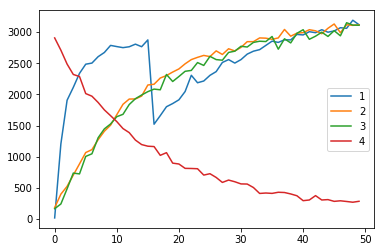

In [127]:
data = [np.zeros((1,1))]*4
for j in range(4):
    for i in range(5):
         data[j] =  np.concatenate( (data[j] , np.loadtxt(str(j+1)+ '/m' +str(i+1) + '.txt').reshape(-1,1)),axis=0)
    data[j] = data[j][1:]

print(len(data))
    
    
m1,m2,m3,m4 = data


flag1 = np.where(m1==10000) #tuple
flag2 = np.where(m2==10000)
flag3 = np.where(m3==10000)
flag4 = np.where(m4==10000)

index1 = 3
index2 = index1 + 1

y1 = list(m1[ flag1[0][index1]+1:flag1[0][index1+1]])
plt.plot(y1,label='1');
plt.plot(m2[flag2[0][index2]+1:flag2[0][index2+1]], label='2') 
plt.plot(m3[flag3[0][index2]+1:flag3[0][index2+1]], label='3')
plt.plot(m4[flag4[0][index1]+1:flag4[0][index1+1]], label='4')

plt.legend() ; plt.show()

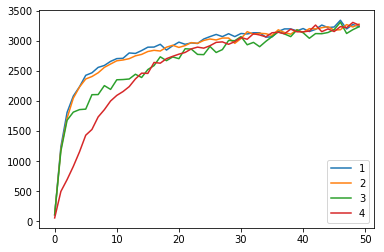

In [128]:
m1=np.loadtxt('m1.txt')
m2=np.loadtxt('m2.txt')
m3=np.loadtxt('m3.txt')
m4=np.loadtxt('m4.txt')

flag1 = np.where(m1==10000) #tuple
flag2 = np.where(m2==10000)
flag3 = np.where(m3==10000)
flag4 = np.where(m4==10000)

index1 = 3
index2 = index1 + 1

y1 = list(m1[ flag1[0][index1]+1:flag1[0][index1+1]])
plt.plot(y1,label='1');
plt.plot(m2[flag2[0][index1]+1:flag2[0][index1+1]], label='2') 
plt.plot(m3[flag3[0][index2]+1:flag3[0][index2+1]], label='3')
plt.plot(m4[flag4[0][index2]+1:flag4[0][index2+1]], label='4')

plt.legend() ; plt.show()

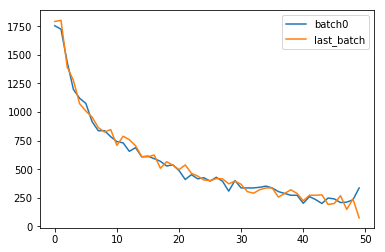

(195, 50)
(97, 100)


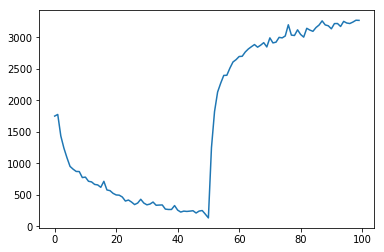

In [129]:
data_batched = []

for i,f in enumerate(flag1[0][:-1]):
    batch = np.array(m1[f+1:flag1[0][i+1]])
    #print(batch.shape)
    if batch.shape[0]==50:
       # print(i)
        #print(batch.shape[0])
        data_batched.append(batch)
data_batched = np.array(data_batched)
#print(data_batched)
plt.plot(data_batched[0], label='batch0')
plt.plot(data_batched[-1], label='last_batch')
plt.legend()
plt.show()
print(data_batched.shape)

data_batched = np.reshape(data_batched[:-1,:], (-1,100))
pickle.dump(data_batched, open('1.pkl', 'wb'))
data = np.reshape(pickle.load(open('1.pkl', 'rb')), (-1, 100))
print(data.shape)
targets=np.array(['1']*data.shape[0])
plt.plot(data[14])
plt.show()
pickle.dump(data, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/1/input.pkl', 'wb')) 
pickle.dump(targets, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/1/targets.pkl', 'wb'))

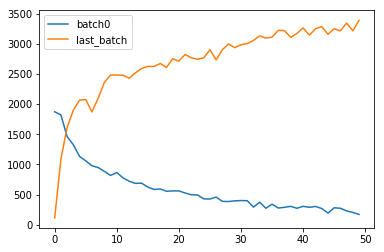

(193, 50)
(96, 100)


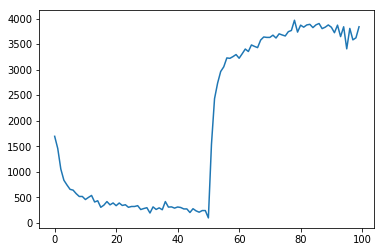

In [130]:
data_batched = []

for i,f in enumerate(flag2[0][:-1]):
    batch = np.array(m2[f+1:flag2[0][i+1]])
    #print(batch.shape)
    if batch.shape[0]==50:
       # print(i)
        #print(batch.shape[0])
        data_batched.append(batch)
data_batched = np.array(data_batched)
#print(data_batched)
plt.plot(data_batched[0], label='batch0')
plt.plot(data_batched[-1], label='last_batch')
plt.legend()
plt.show()
print(data_batched.shape)

data_batched = np.reshape(data_batched[:-1,:], (-1,100))
pickle.dump(data_batched, open('2.pkl', 'wb'))
data = np.reshape(pickle.load(open('2.pkl', 'rb')), (-1, 100))
print(data.shape)
targets=np.array(['2']*data.shape[0])
plt.plot(data[14])
plt.show()
pickle.dump(data, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/2/input.pkl', 'wb')) 
pickle.dump(targets, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/2/targets.pkl', 'wb'))

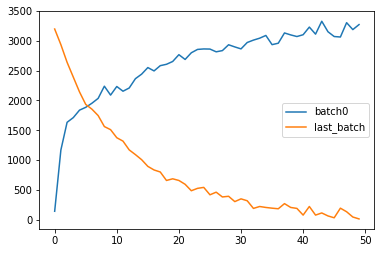

(196, 50)
(97, 100)


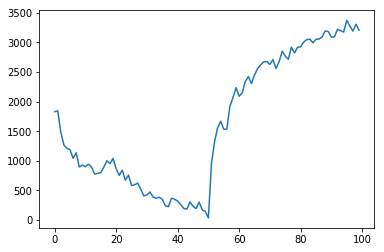

In [133]:
data_batched = []

for i,f in enumerate(flag3[0][:-1]):
    batch = np.array(m3[f+1:flag3[0][i+1]])
    #print(batch.shape)
    if batch.shape[0]==50:
       # print(i)
        #print(batch.shape[0])
        data_batched.append(batch)
data_batched = np.array(data_batched)
#print(data_batched)
plt.plot(data_batched[0], label='batch0')
plt.plot(data_batched[-1], label='last_batch')
plt.legend()
plt.show()
print(data_batched.shape)

data_batched = np.reshape(data_batched[1:-1,:], (-1,100))
pickle.dump(data_batched, open('3.pkl', 'wb'))
data = np.reshape(pickle.load(open('3.pkl', 'rb')), (-1, 100))
print(data.shape)
targets=np.array(['3']*data.shape[0])
plt.plot(data[14])
plt.show()
pickle.dump(data, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/3/input.pkl', 'wb')) 
pickle.dump(targets, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/3/targets.pkl', 'wb'))

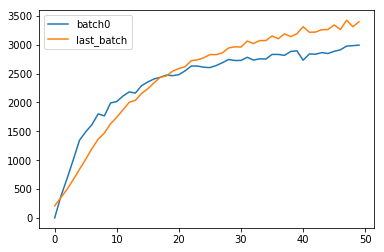

(194, 50)
(96, 100)


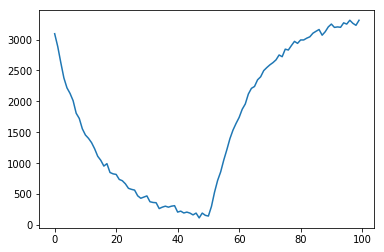

In [136]:
data_batched = []

for i,f in enumerate(flag4[0][:-1]):
    batch = np.array(m4[f+1:flag4[0][i+1]])
    #print(batch.shape)
    if batch.shape[0]==50:
       # print(i)
        #print(batch.shape[0])
        data_batched.append(batch)
data_batched = np.array(data_batched)
#print(data_batched)
plt.plot(data_batched[0], label='batch0')
plt.plot(data_batched[-1], label='last_batch')
plt.legend()
plt.show()
print(data_batched.shape)

data_batched = np.reshape(data_batched[1:-1,:], (-1,100))
pickle.dump(data_batched, open('4.pkl', 'wb'))
data = np.reshape(pickle.load(open('4.pkl', 'rb')), (-1, 100))
print(data.shape)
targets=np.array(['4']*data.shape[0])
plt.plot(data[14])
plt.show()
pickle.dump(data, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/4/input.pkl', 'wb')) 
pickle.dump(targets, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/4/targets.pkl', 'wb'))

In [ ]:
# Attention ! Ligne suivante à modifier au cas par cas : 
# si la 1er batch est une décharge : on l'enlève (1er indice : 1)
# sinon : 1er indice : pas besoin de préciser
# si le dernier batch est une charge : on l'enlève (dernier indice : -1)
# sinon : dernier indice : pas besoin de préciser 

(97, 100)


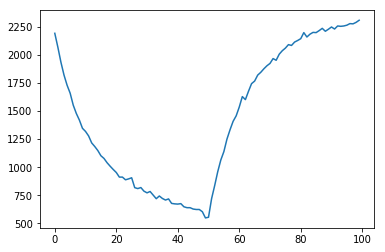

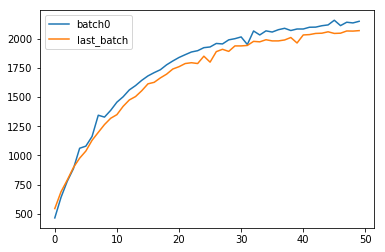

(194, 50)


In [82]:
data_batched = []

for i,f in enumerate(flag4[0][:-1]):
    batch = np.array(roro4[f+1:flag4[0][i+1]])
    #print(batch.shape)
    if batch.shape[0]==50:
       # print(i)
        #print(batch.shape[0])
        data_batched.append(batch)
data_batched = np.array(data_batched)
#print(data_batched)
plt.plot(data_batched[0], label='batch0')
plt.plot(data_batched[-1], label='last_batch')
plt.legend()
plt.show()
print(data_batched.shape)

(96, 100)


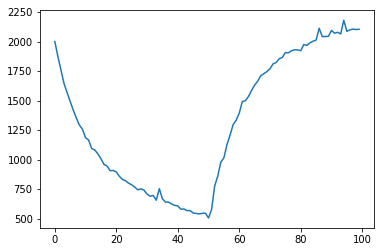

In [83]:
data_batched = np.reshape(data_batched[1:-1,:], (-1,100))
pickle.dump(data_batched, open('gauche.pkl', 'wb'))
data = np.reshape(pickle.load(open('gauche.pkl', 'rb')), (-1, 100))
print(data.shape)
targets=np.array(['gauche']*data.shape[0])
plt.plot(data[13])
plt.show()
pickle.dump(data, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/gauche/input.pkl', 'wb')) 
pickle.dump(targets, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/gauche/targets.pkl', 'wb'))

In [22]:
data

array([[ 384.,   58.,   53., ..., 3727., 3639., 3711.],
       [ 352.,   42.,   48., ..., 3703., 3679., 3675.],
       [ 346.,   32.,   48., ..., 3679., 3687., 3678.],
       ...,
       [ 336.,  115.,   14., ..., 3525., 3687., 3703.],
       [ 320.,   54.,   56., ..., 3719., 3727., 3663.],
       [ 346.,   56.,   18., ..., 3679., 3707., 3695.]])